In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random
from utils import PokemonResNet, train_dataset, test_loader, train_loader, test_dataset
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


c:\Users\Student\Documents\1. Github\Pokemon-Classifier\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Student\Documents\1. Github\Pokemon-Classifier\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


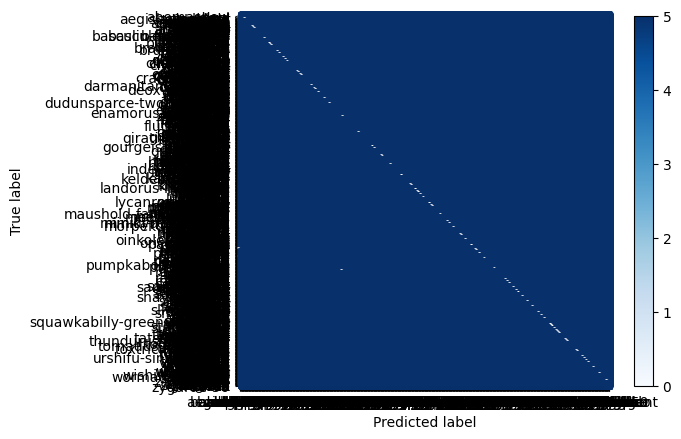

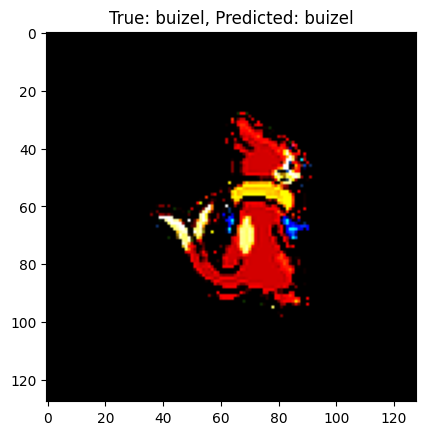

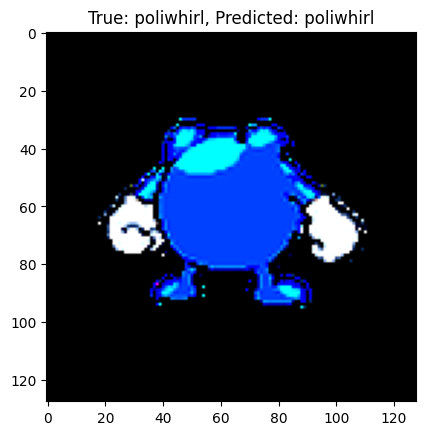

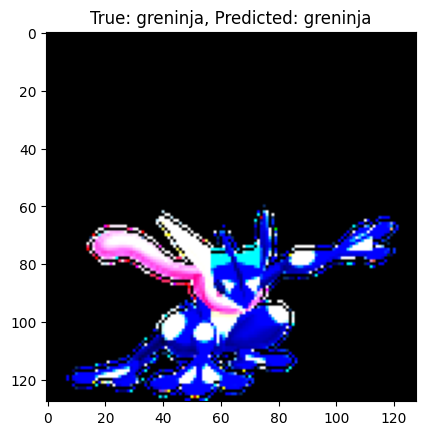

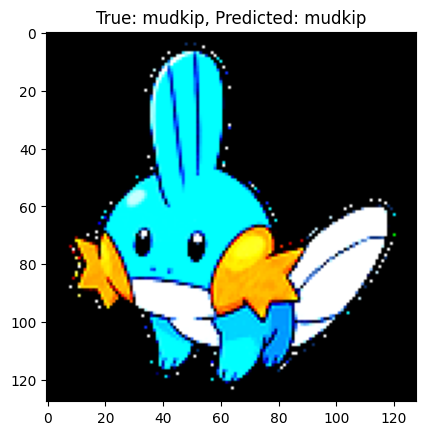

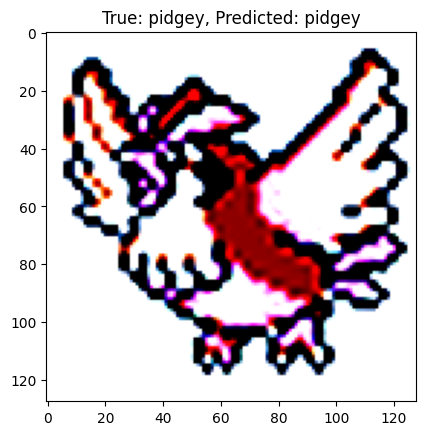

In [2]:
model = PokemonResNet(num_classes=len(train_dataset.classes))
model.load_state_dict(torch.load("pokemon_resnet18.pth"))
model = model.to(device)

all_preds = []
all_labels = []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds, labels=range(len(train_dataset.classes)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=train_dataset.classes)
disp.plot(cmap='Blues')
plt.show()

# Visualize predictions
model.eval()
for i in range(5):
    idx = random.randint(0, len(test_dataset) - 1)
    image, label = test_dataset[idx]
    image_tensor = image.unsqueeze(0).to(device)  # Add batch dimension
    output = model(image_tensor)
    _, predicted = torch.max(output, 1)

    plt.imshow(image.permute(1, 2, 0).cpu().numpy().clip(0, 1))
    plt.title(f"True: {test_dataset.classes[label]}, Predicted: {test_dataset.classes[predicted.item()]}")
    plt.show()